# Is Japan overbanked?

Due to the long lasting deflation, Japanese economy is heavily cash dependent. Extremely low interest rates harmed bank profitability and some large financial institutions decided to reduce the number of ATM machines to cut cost. Would it affect consumer sentiment and bad habit of holding cash?

Bank for International Settlements
https://www.bis.org/cpmi/publ/d172.htm

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df_cash = pd.read_csv('comptbls_16.csv',skiprows=135).iloc[:23,:6]
df_cash = df_cash.rename({'Unnamed: 0':'Countries'},axis=1)
df_cash = df_cash.replace('nap','NaN')
df_cash = df_cash.replace('nav','NaN')
df_cash

,Countries,2012,2013,2014,2015,2016
0,Australia,4.14,4.27,4.39,4.63,4.70
1,Belgium,NaN,NaN,NaN,NaN,NaN
2,Brazil,3.89,3.83,3.83,3.76,3.71
3,Canada,3.76,3.75,3.77,4.07,4.16
4,China,NaN,NaN,NaN,NaN,NaN
5,France,NaN,NaN,NaN,NaN,NaN
6,Germany,NaN,NaN,NaN,NaN,NaN
7,Hong Kong SAR,14.82,15.91,15.64,15.50,16.86
8,India,11.87,11.58,11.64,12.16,8.79
9,Italy,NaN,NaN,NaN,NaN,NaN


In [3]:
df_ATM = pd.read_csv('comptbls_16.csv',skiprows=2326).iloc[:23,:6]
df_ATM = df_ATM.rename({'Unnamed: 0':'Countries'},axis=1)
df_ATM = df_ATM.replace('nav','NaN')
df_ATM

,Countries,2012,2013,2014,2015,2016
0,Australia,"1,331","1,303","1,336","1,325","1,355"
1,Belgium,"1,417","1,338","1,137","1,387","1,538"
2,Brazil,878,908,910,892,854
3,Canada,"1,711","1,861","1,868","1,861","1,888"
4,China,308,382,450,631,668
5,France,897,894,"1,738",915,878
6,Germany,"1,027","1,026","1,071","1,061","1,035"
7,Hong Kong SAR,NaN,NaN,NaN,NaN,NaN
8,India,94,131,149,165,171
9,Italy,847,831,821,836,817


In [4]:
df_join = pd.DataFrame(df_cash['Countries'])
df_join['Cash'] = df_cash['2016'].astype(float)
df_join['ATM'] = df_ATM['2016'].str.replace(',','').astype(float)
df_join

,Countries,Cash,ATM
0,Australia,4.70,1355.0
1,Belgium,NaN,1538.0
2,Brazil,3.71,854.0
3,Canada,4.16,1888.0
4,China,NaN,668.0
5,France,NaN,878.0
6,Germany,NaN,1035.0
7,Hong Kong SAR,16.86,NaN
8,India,8.79,171.0
9,Italy,NaN,817.0


In [5]:
df_join = df_join.dropna(how='any').reset_index(drop=True)
df_join

,Countries,Cash,ATM
0,Australia,4.70,1355.0
1,Brazil,3.71,854.0
2,Canada,4.16,1888.0
3,India,8.79,171.0
4,Japan,19.96,1078.0
5,Korea,5.94,2368.0
6,Mexico,7.27,396.0
7,Russia,10.23,1373.0
8,Saudi Arabia,8.25,563.0
9,Singapore,10.36,489.0


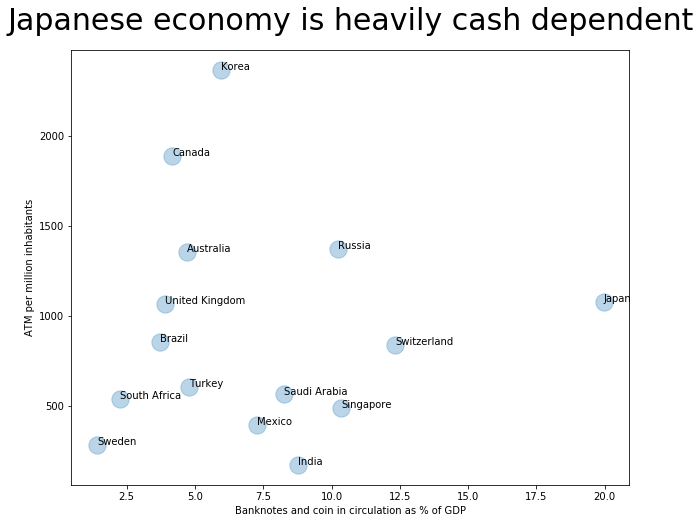

In [6]:
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(df_join.Cash,df_join.ATM,s=300,alpha=0.3)
ax.set_title('Japanese economy is heavily cash dependent',pad=20)
ax.title.set_fontsize(30)
ax.set_xlabel('Banknotes and coin in circulation as % of GDP')
ax.set_ylabel('ATM per million inhabitants')

for i in range(0,len(df_join)):
    ax.annotate(df_join.Countries[i], (df_join.Cash[i], df_join.ATM[i]))